Выполнить классификацию изображений на наборе данных NotMNIST dataset

## Импорт библиотек

In [123]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical

import os

import random
random.seed(0)

## Загрузка данных

Проверяем, какие буквы есть в наборе данных:

In [125]:
PATH = 'notMNIST_small'

classes = os.listdir(PATH)
num_classes = len(classes)

print("There are {} classes: {}".format(num_classes, classes))

There are 10 classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


Подготовка матриц X и y — то есть изображений и соответствующих им меток:

Цикл for Category in Categories: перебирает каждый класс из списка Categories. Для каждого класса он идет в соответствующую директорию, загружает изображения, изменяет их размер, преобразует в оттенки серого и добавляет их в training_data, вместе с меткой класса.

После выполнения этого кода у вас будет список training_data, который содержит пары изображений и меток классов, готовых для использования в задаче обучения модели машинного обучения.

In [126]:
X = []
y = []

for directory in os.listdir(PATH):
    for image in os.listdir(PATH + '/' + directory):
        try:
            path = PATH + '/' + directory + '/' + image
            img = Image.open(path)
            img.load()
            img_X = np.asarray(img, dtype=np.int16)
            X.append(img_X)
            y.append(directory)
        except:
            None
            
X = np.asarray(X)
y = np.asarray(y)

In [127]:
y[0]

'A'

In [128]:
num_images = len(X) # Количество изображений
size = len(X[0]) # Размер изображения

X.shape, y.shape, size

((18724, 28, 28), (18724,), 28)

## Визуализация данных

Этот код для отображения первого изображения из массива X в градациях серого, а также выводит заголовок, содержащий информацию о классе этого изображения из массива y.

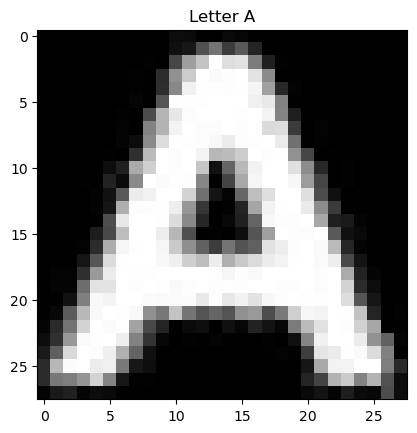

In [129]:
plt.imshow(X[0], cmap='gray')
plt.title("Letter {}".format(y[0]));

Этот код создает сетку графиков с изображениями из каждого класса данных. Он выводит по 5 изображений для каждого класса на одной строке.

Проходя циклом по отсортированным классам (classes), код создает новый подграфик с помощью plt.subplot(), затем использует plt.imshow() для отображения изображения в градациях серого. Каждый подграфик имеет заголовок с номером буквы (класса).

Затем plt.tight_layout() используется для автоматической оптимизации размещения графиков, чтобы избежать их перекрытия. Наконец, plt.show() отображает весь сет графиков.

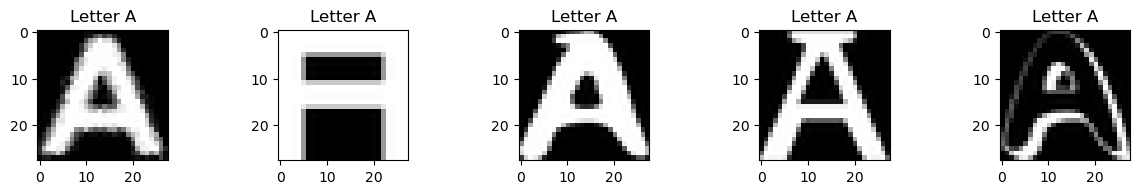

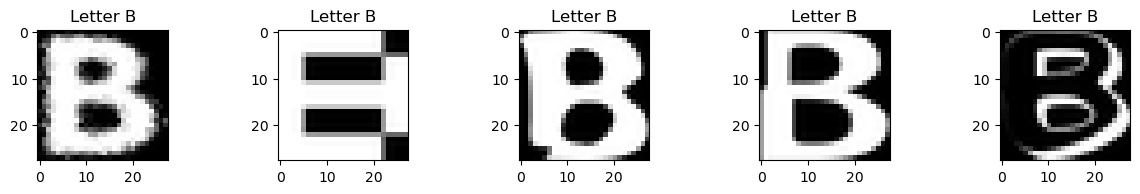

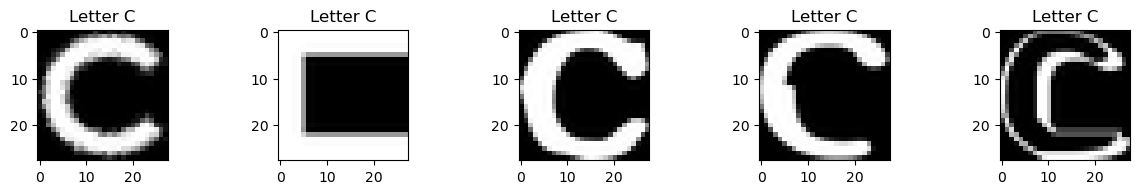

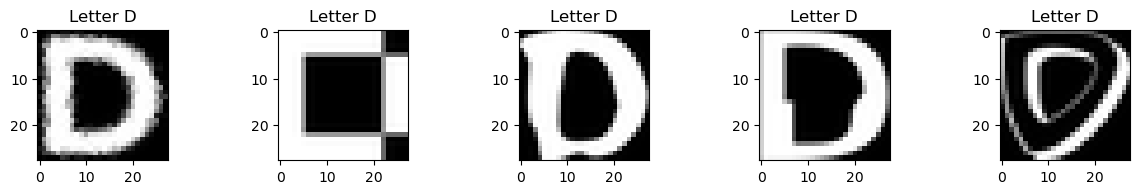

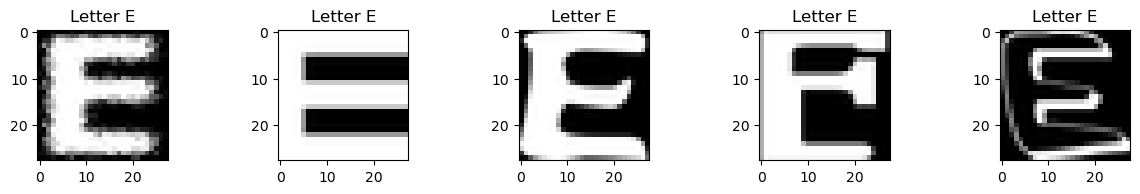

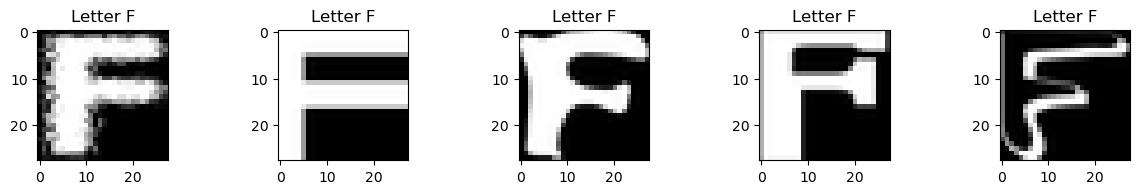

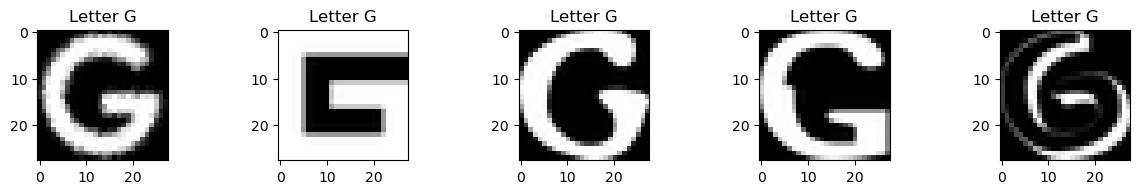

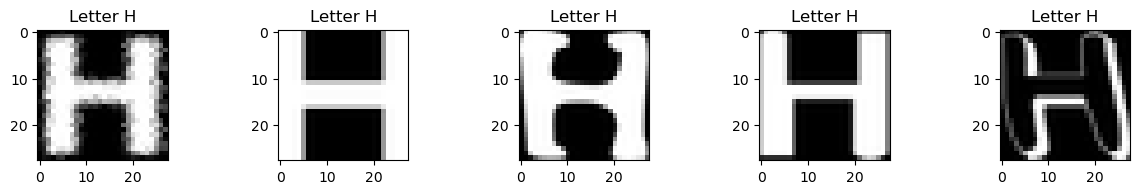

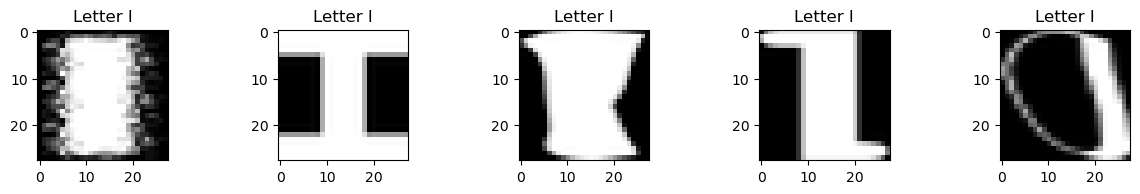

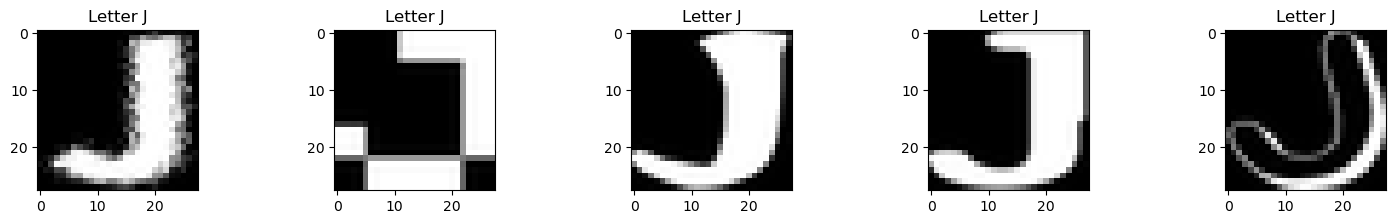

In [130]:
for let in sorted(classes):
    letter = X[y == let] 

    plt.figure(figsize=(15,20))
    for i in range(5):
        plt.subplot(10, 5, i+1)
        plt.imshow(letter[i], cmap='gray')
        plt.title("Letter {}".format(let))
    
plt.tight_layout()
plt.show();

Подготовка данных

Для того чтобы преобразовать метки из букв A-J в числа 1-10, вы можете создать словарь сопоставления, который будет соответствовать каждой букве её числовому значению. Затем вы можете использовать этот словарь для замены буквенных меток числовыми метками в массиве y. Вот как это можно сделать:

In [131]:
y

array(['A', 'A', 'A', ..., 'J', 'J', 'J'], dtype='<U1')

In [132]:
y = list(map(lambda x: ord(x) - ord('A'), y))
y = np.asarray(y)

In [133]:
y

array([0, 0, 0, ..., 9, 9, 9])

Перетасовка данных, чтобы при разделении на обучающий и тестовый наборы на следующем шаге у нас были примеры каждой буквы в обоих наборах:

indices создается массив индексов от 0 до количества строк в массиве X.
np.random.shuffle(indices) выполняет перемешивание этих индексов в случайном порядке.
Затем массивы X и y переупорядочиваются в соответствии с перемешанными индексами.
Таким образом, результатом будет новый порядок данных в массивах X и y, обеспечивающий более случайное распределение.

In [134]:
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

Разделение данных на обучающие и тестовые наборы:

In [135]:
num_train_img = np.int(0.7 * X.shape[0])
num_train_img

C:\Users\user\AppData\Local\Temp\ipykernel_13368\192301650.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_train_img = np.int(0.7 * X.shape[0])


13106

In [139]:
X_train = X[:num_train_img]
y_train = y[:num_train_img]

X_test = X[num_train_img:]
y_test = y[num_train_img:]

In [143]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13106, 28, 28)
(13106,)
(5618, 28, 28)
(5618,)


Преобразование y в вероятности:
Этот код проверяет, имеют ли метки классов y_train и y_test одну размерность (то есть, являются ли одномерными массивами). Если метки классов имеют одну размерность (то есть, это не бинарные или многомерные метки), то они преобразуются в бинарный формат с помощью функции to_categorical из библиотеки Keras.

В данном случае, параметр 10 в функции to_categorical указывает на количество классов. Это используется для создания бинарного представления меток классов, где каждая метка преобразуется в вектор длиной 10, где только один элемент равен 1 (индекс соответствующего класса), а все остальные элементы равны 0. Это позволяет модели работать с метками классов в виде вероятностных распределений, что часто используется при обучении нейронных сетей для задач классификации.

In [144]:
if y_train.ndim == 1: y_train = to_categorical(y_train, 10)
if y_test.ndim == 1: y_test = to_categorical(y_test, 10)

Нормализация

In [23]:
if np.max(X_train) == 255: X_train = X_train / 255 
if np.max(X_test) == 255: X_test = X_test / 255

Reshaping X — выравнивание изображений, чтобы у нас были одномерные изображения, подходящие для входных данных сети mlp:

Если X_train имеет три измерения (например, (количество_изображений, высота, ширина)), то он решейпится в четырехмерный массив (количество_изображений, высота, ширина, количество_каналов), где количество каналов установлено на 1. Это делается с помощью .reshape(-1, size, size, 1).

Аналогично для X_test.

Данные также приводятся к типу данных float32, что является стандартным типом для работы с нейронными сетями.

In [148]:
X_train.shape, X_test.shape

((13106, 28, 28, 1), (5618, 28, 28, 1))

In [146]:
if X_train.ndim == 3:
    X_train = X_train.reshape(-1, size, size, 1).astype('float32')
    X_test = X_test.reshape(-1, size, size, 1).astype('float32')

Проверим размеры всех наборов данных:

In [158]:
X_train.shape, X_test.shape

((13106, 28, 28, 1), (5618, 28, 28, 1))

код X_train.shape[1:] используется для получения размерности входных данных, которая будет использоваться в определении архитектуры нейронной сети. В данном случае input_shape будет представлять собой кортеж (высота, ширина, количество_каналов) для каждого изображения. Этот кортеж будет определять размер входных данных для первого слоя нейронной сети.

In [159]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 1)

## Model - Convolutional Neural Network

In [165]:
model_cnn = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_cnn.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_24 (Dense)            (None, 512)              

## CNN training

In [166]:
model_cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
410/410 [==============================] - 10s 22ms/step - loss: 1.1527 - accuracy: 0.8341
Epoch 2/10
410/410 [==============================] - 9s 21ms/step - loss: 0.2345 - accuracy: 0.9292
Epoch 3/10
410/410 [==============================] - 9s 21ms/step - loss: 0.1431 - accuracy: 0.9555
Epoch 4/10
410/410 [==============================] - 9s 21ms/step - loss: 0.1118 - accuracy: 0.9653
Epoch 5/10
410/410 [==============================] - 9s 21ms/step - loss: 0.0918 - accuracy: 0.9722
Epoch 6/10
410/410 [==============================] - 9s 21ms/step - loss: 0.0759 - accuracy: 0.9780
Epoch 7/10
410/410 [==============================] - 9s 21ms/step - loss: 0.0887 - accuracy: 0.9747
Epoch 8/10
410/410 [==============================] - 9s 21ms/step - loss: 0.0609 - accuracy: 0.9820
Epoch 9/10
410/410 [==============================] - 9s 21ms/step - loss: 0.0433 - accuracy: 0.9874
Epoch 10/10
410/410 [==============================] - 9s 21ms/step - loss: 0.0751 - accur

## CNN evaluation

In [167]:
score = model_cnn.evaluate(X_test, y_test, verbose=1)

176/176 [==============================] - 1s 4ms/step - loss: 0.4341 - accuracy: 0.9083


CNN получает точность 91% и потерю 0,4 на тестовом наборе.